In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import time
from scipy.fft import ifft,fft
from scipy import interpolate

In [4]:
muse_path = '/content/drive/My Drive/MU.txt'
df = pd.read_csv(muse_path, delimiter='\t')
csv_file_path = 'output.csv'
df.to_csv(csv_file_path, index=False)

In [5]:
df.head()

,978111,132669,MU,TP9,6,459,"475,474,477,486,486,476,479,483,489,483,482,485,486,483,474,475,484,481,482,478,476,479,487,481,480,479,487,486,471,487,491,488,491,470,460,485,484,482,485,480,487,488,479,471,479,485,484,484,478,478,479,511,524,529,530,529,525,524,533,520,516,520,525,526,521,519,526,527,529,520,520,514,522,523,514,515,517,523,517,515,528,522,530,520,519,504,532,529,528,532,523,531,524,514,522,524,524,519,516,512,519,519,526,517,519,512,523,527,518,530,529,527,524,519,522,520,516,527,525,522,528,524,518,524,530,522,518,514,518,533,521,526,527,524,524,527,512,519,520,519,515,522,535,528,528,526,526,539,528,519,528,527,523,529,519,511,524,522,525,520,515,519,522,519,517,521,528,523,527,530,515,532,526,528,518,523,535,528,524,532,529,522,519,524,532,529,523,503,513,519,516,499,513,516,505,510,508,511,513,511,500,509,515,505,509,504,504,513,509,512,506,504,513,507,504,511,511,504,515,505,516,510,517,511,514,513,520,506,504,510,509,519,516,506,502,508,510,507,500,506,508,510,513,513,517,516,511,510,499,509,514,507,503,504,505,514,498,501,507,507,506,499,514,513,518,508,502,512,514,507,506,510,499,513,513,507,507,507,507,500,503,501,508,512,507,507,521,517,525,520,516,513,512,512,511,507,508,506,505,508,515,518,513,511,508,513,511,513,500,504,516,518,513,506,510,516,511,509,505,510,515,501,501,506,517,523,516,517,533,520,521,515,511,523,517,513,514,527,523,517,514,514,512,519,514,515,514,515,517,521,520,530,522,522,516,517,523,524,509,517,524,525,515,523,516,523,525,519,516,516,530,519,517,522,512,521,522,523,518,516,522,518,515,514,531,525,519,519,522,527,525,521,516,507,511,523,515,514,523,516,515,511,515,517,521,513,509,527,519,523,521,513,519,530,528,520,518,515,514,506,516,521,522,517,514,506,517,521,524,509,513,521,520,521,514,516,520,519,519,514,515,517,522,511,512,517,517,511,512,513,519,523,515,513,517,519,516,514,517"
0,978112,132669,MU,FP1,6,459,"468,487,493,493,498,493,491,490,492,487,483,48..."
1,978113,132669,MU,FP2,6,459,"482,475,490,500,485,470,470,482,490,484,478,48..."
2,978114,132669,MU,TP10,6,459,"470,470,478,489,487,475,469,478,488,483,474,48..."
3,978115,132670,MU,TP9,7,493,"506,499,495,491,492,507,496,500,498,496,499,50..."
4,978116,132670,MU,FP1,7,493,"505,515,513,506,512,520,512,521,517,512,517,52..."


In [6]:
df.columns = ['id', 'event_id', 'device', 'channel', 'code', 'size', 'data']

In [7]:
df.head()

,id,event_id,device,channel,code,size,data
0,978112,132669,MU,FP1,6,459,"468,487,493,493,498,493,491,490,492,487,483,48..."
1,978113,132669,MU,FP2,6,459,"482,475,490,500,485,470,470,482,490,484,478,48..."
2,978114,132669,MU,TP10,6,459,"470,470,478,489,487,475,469,478,488,483,474,48..."
3,978115,132670,MU,TP9,7,493,"506,499,495,491,492,507,496,500,498,496,499,50..."
4,978116,132670,MU,FP1,7,493,"505,515,513,506,512,520,512,521,517,512,517,52..."


In [9]:
FP1_df=df[df['channel']=='FP1']
FP2_df=df[df['channel']=='FP2']
df=pd.concat([FP1_df,FP2_df])

In [10]:
df['data'] = df['data'].apply(lambda x: [float(num) for num in x.split(',')])
print(df)

             id  event_id device channel  code  size  \
0        978112    132669     MU     FP1     6   459   
4        978116    132670     MU     FP1     7   493   
8        978120    132671     MU     FP1     6   459   
12       978124    132672     MU     FP1     6   459   
16       978128    132673     MU     FP1     1   493   
...         ...       ...    ...     ...   ...   ...   
163913  1142025    173647     MU     FP2    -1   460   
163917  1142029    173648     MU     FP2    -1   460   
163921  1142033    173649     MU     FP2    -1   460   
163925  1142037    173650     MU     FP2    -1   460   
163929  1142041    173651     MU     FP2    -1   460   

                                                     data  
0       [468.0, 487.0, 493.0, 493.0, 498.0, 493.0, 491...  
4       [505.0, 515.0, 513.0, 506.0, 512.0, 520.0, 512...  
8       [502.0, 516.0, 514.0, 508.0, 514.0, 520.0, 520...  
12      [512.0, 529.0, 527.0, 526.0, 522.0, 522.0, 525...  
16      [506.0, 511.0, 513.

In [11]:
df.head()

,id,event_id,device,channel,code,size,data
0,978112,132669,MU,FP1,6,459,"[468.0, 487.0, 493.0, 493.0, 498.0, 493.0, 491..."
4,978116,132670,MU,FP1,7,493,"[505.0, 515.0, 513.0, 506.0, 512.0, 520.0, 512..."
8,978120,132671,MU,FP1,6,459,"[502.0, 516.0, 514.0, 508.0, 514.0, 520.0, 520..."
12,978124,132672,MU,FP1,6,459,"[512.0, 529.0, 527.0, 526.0, 522.0, 522.0, 525..."
16,978128,132673,MU,FP1,1,493,"[506.0, 511.0, 513.0, 518.0, 505.0, 522.0, 526..."


In [12]:
def resample_array(array, target_length):
    # Create an array of indices for the input array
    input_indices = np.linspace(0, len(array)-1, len(array))

    # Create an array of indices for the resampled array
    resampled_indices =np.linspace(0,len(array)-1,target_length)

    # Create a linear interpolation function based on the input array
    interpolator = np.interp(resampled_indices, input_indices, array)

    # Use the interpolator to create the resampled array
    resampled_array = interpolator

    return resampled_array.tolist()

In [13]:
median_length = np.median(df["data"].apply(len))
# Resample all the data arrays to the median length(use lambda function and apply)
df["resampled_data"] = df["data"].apply(lambda x: resample_array(x,int(median_length)))

# Check the length of the resampled arrays
df["resampled_data_length"] = df["resampled_data"].apply(len)

# Display the first few rows of the updated DataFrame
df.head()

,id,event_id,device,channel,code,size,data,resampled_data,resampled_data_length
0,978112,132669,MU,FP1,6,459,"[468.0, 487.0, 493.0, 493.0, 498.0, 493.0, 491...","[468.0, 486.958605664488, 492.9738562091503, 4...",460
4,978116,132670,MU,FP1,7,493,"[505.0, 515.0, 513.0, 506.0, 512.0, 520.0, 512...","[505.0, 514.8562091503268, 511.9934640522876, ...",460
8,978120,132671,MU,FP1,6,459,"[502.0, 516.0, 514.0, 508.0, 514.0, 520.0, 520...","[502.0, 515.9694989106754, 514.0087145969499, ...",460
12,978124,132672,MU,FP1,6,459,"[512.0, 529.0, 527.0, 526.0, 522.0, 522.0, 525...","[512.0, 528.9629629629629, 527.0087145969499, ...",460
16,978128,132673,MU,FP1,1,493,"[506.0, 511.0, 513.0, 518.0, 505.0, 522.0, 526...","[506.0, 511.1437908496732, 513.718954248366, 5...",460


In [14]:
data_array = np.array(df["resampled_data"].tolist())
codes = df['code'].tolist()

In [15]:
srate = 220
def time_frequency(data, cmwX, nKern):
  # set up convolution parameters
    nData   = data.shape[1]
    nConv   = nData + nKern - 1
    halfwav = (nKern-1)//2

    # initialize time-frequency output matrix
    tf = np.zeros((data.shape[0], cmwX.shape[0], data.shape[1])) # channels X frequency X times

    # loop over channels
    for chani in range(data.shape[0]):

        # compute Fourier coefficients of EEG data
        eegX = fft(data[chani, :] , nConv)

        # perform convolution and extract power (vectorized across frequencies)
        as_ = ifft(cmwX * eegX[None, :], axis=1)
        as_ = as_[:, halfwav: -halfwav]
        tf[chani, :, :] = np.abs(as_) ** 2

    return tf
def get_cmwX(nData, freqrange=[1,40], numfrex=42):
    pi = np.pi
    wavtime = np.arange(-2,2-1/srate,1/srate)
    nKern = len(wavtime)
    nConv = nData + nKern - 1
    frex = np.linspace(freqrange[0],freqrange[1],numfrex)
   # create complex morlet wavelets array
    cmwX = np.zeros((numfrex, nConv), dtype=complex)

    # number of cycles
    numcyc = np.linspace(3,15,numfrex);
    for fi in range(numfrex):
        # create time-domain wavelet
        s = numcyc[fi] / (2*pi*frex[fi])
        twoSsquared = (2*s) ** 2
        cmw = np.exp(2*1j*pi*frex[fi]*wavtime) * np.exp( (-wavtime**2) / twoSsquared )


        # compute fourier coefficients of wavelet and normalize
        cmwX[fi, :] = fft(cmw, nConv)
        cmwX[fi, :] = cmwX[fi, :] / max(cmwX[fi, :])

    return cmwX, nKern, frex

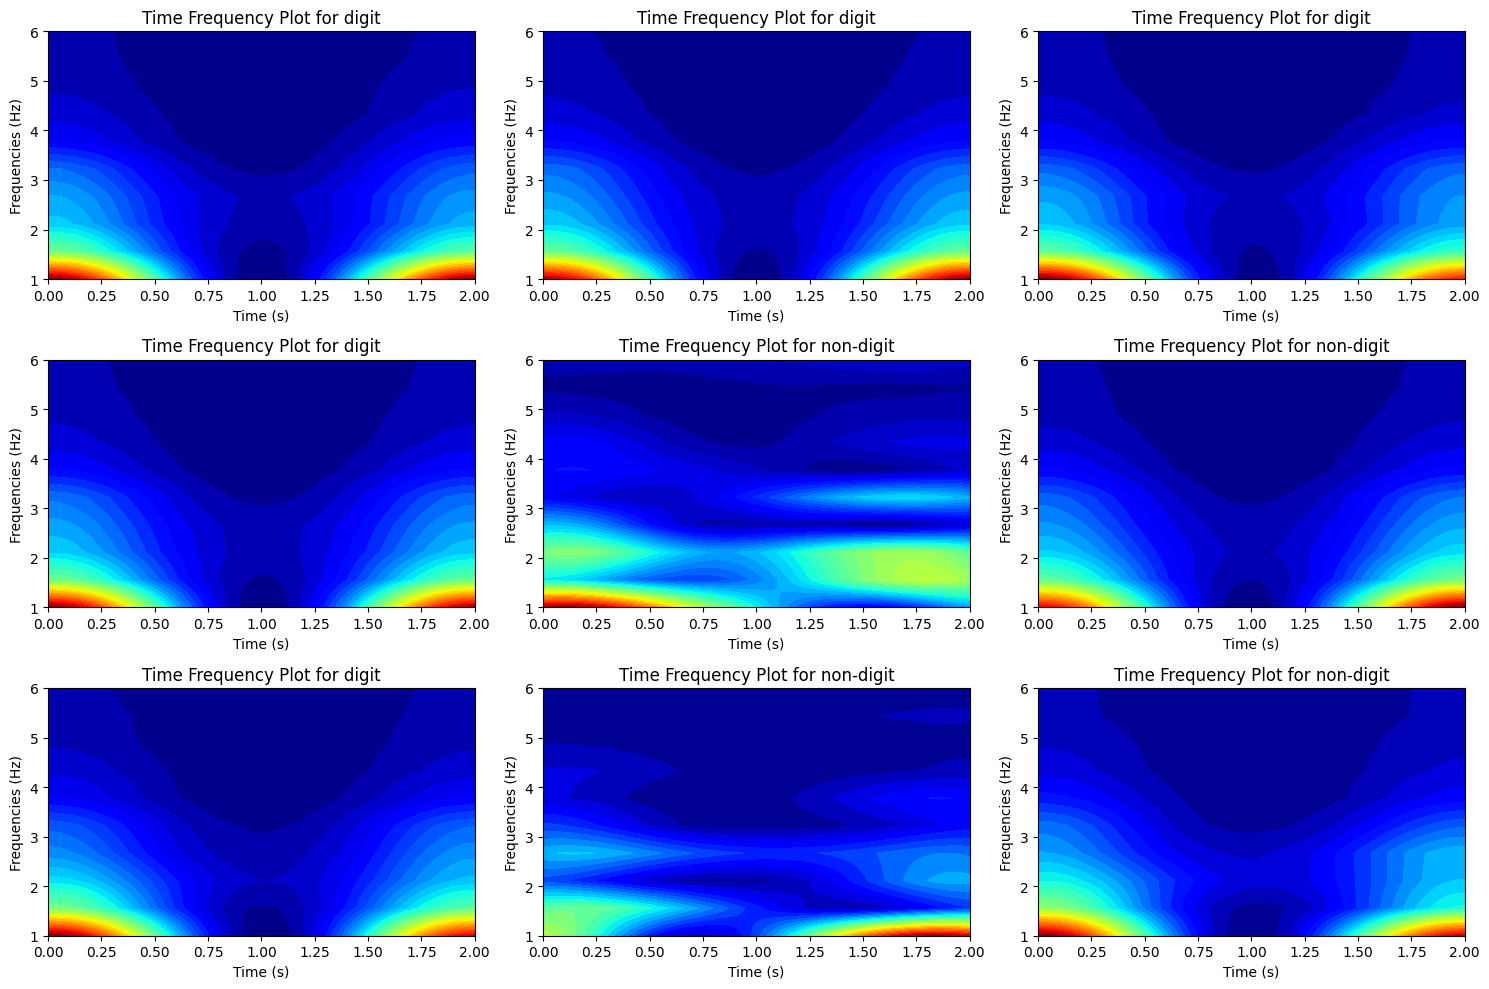

In [18]:
starting_freq = 1
end_freq = 6
num_frequencies = 10
median_length=460

#  Creates an array of time values starting from 0 to 2 seconds, with a total number of elements defined by median_length.
times = np.linspace(0,2,median_length)

nData = data_array.shape[1]
cmwX, nKern, frex = get_cmwX(nData, freqrange=[starting_freq, end_freq], numfrex=num_frequencies)
tf = time_frequency(data_array, cmwX, nKern)

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i,ax in enumerate(axs.flat):
  x = random.randint(0, tf.shape[0])
  contour = ax.contourf(times, frex, tf[x,:,:], 40, cmap='jet')
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Frequencies (Hz)')
  ax.set_title(f"Time Frequency Plot for {'non-digit' if codes[x] == -1 else 'digit'}")

fig.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')